<a href="https://colab.research.google.com/github/CienciaDatosUdea/002_EstudiantesAprendizajeEstadistico/blob/main/semestre2025-1/Laboratorios/Laboratorio_07_nn_zeroV1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


In [64]:
import pandas as pd
import scipy as sc
import numpy as np
import sympy as sp
import h5py
import matplotlib.pylab as plt
from google.colab import drive

In [65]:
N = np.array([0, 0, 1, 1, 2, 2, 2, 3, 3, 3, 3, 4, 5, 5, 5

])
np.median(N)

np.float64(3.0)

In [66]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [67]:
path ="/content/sample_data"
data_train= f"/content/drive/MyDrive/U/2025-1/InteligenciaAtificial/Laboratorios/train_catvnoncat.h5"
train_dataset = h5py.File(data_train, "r")
data_test= f"/content/drive/MyDrive/U/2025-1/InteligenciaAtificial/Laboratorios/test_catvnoncat.h5"
test_dataset = h5py.File(data_test, "r")

In [68]:
# Read the data
xtrain_classes, xtrain, train_label =\
train_dataset["list_classes"],train_dataset["train_set_x"],train_dataset["train_set_y"]

test_classes, xtest,test_label =\
test_dataset["list_classes"],test_dataset["test_set_x"],test_dataset["test_set_y"]


In [69]:
np.shape(xtrain)

(209, 64, 64, 3)

In [70]:
np.shape(xtrain[0])

(64, 64, 3)

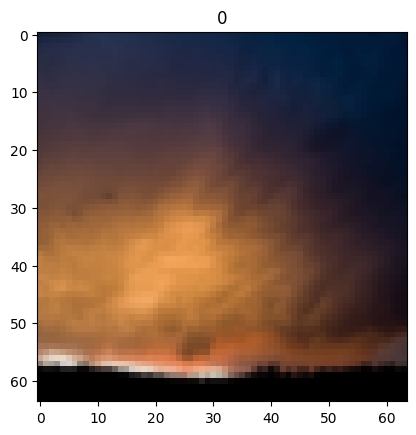

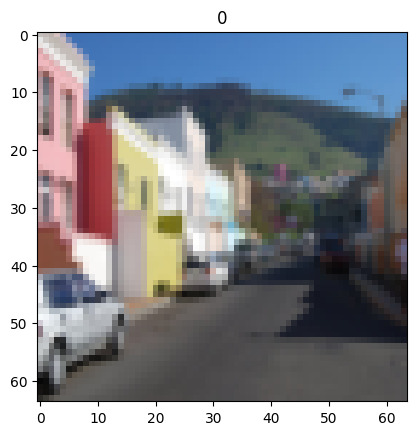

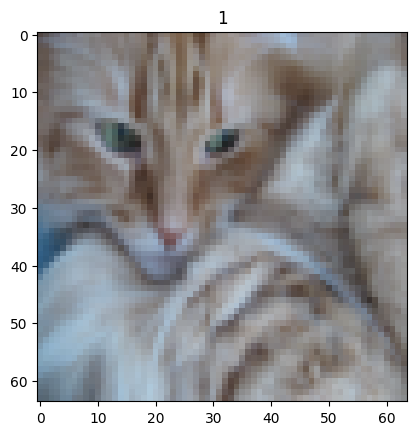

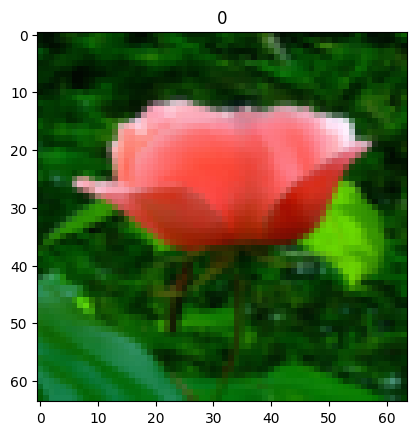

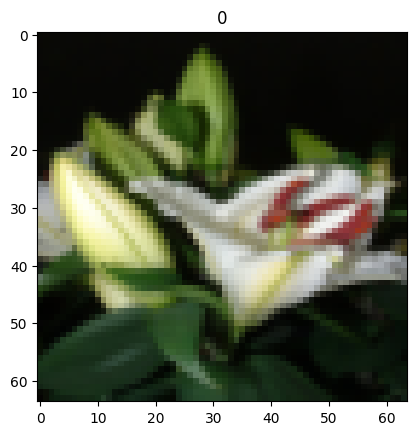

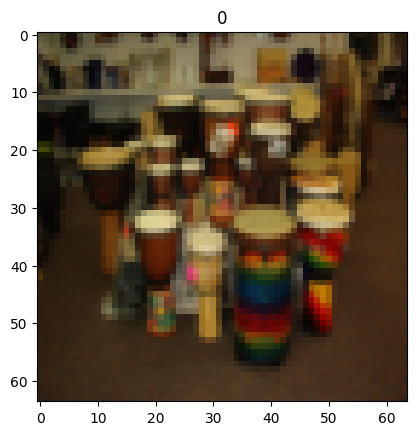

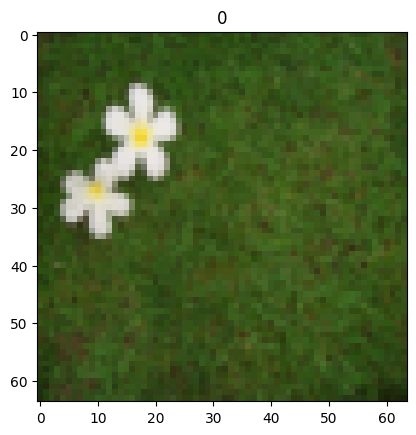

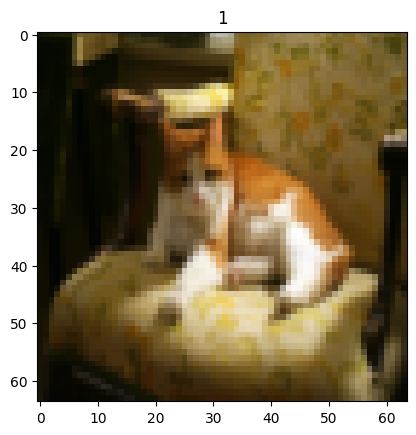

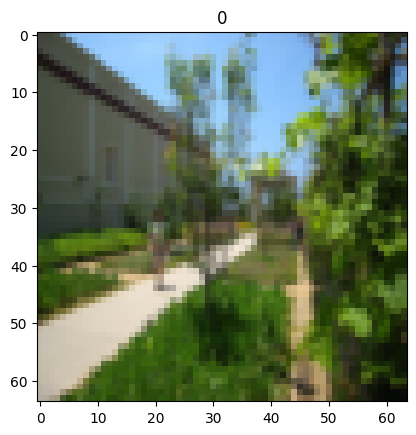

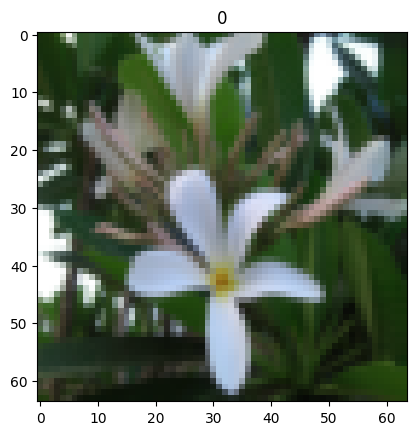

In [71]:
for i in range(0, 10):
    plt.figure()
    plt.imshow(xtrain[i])
    plt.title(train_label[i])
    plt.show()

In [72]:
np.shape(xtrain[0])

(64, 64, 3)

In [73]:
np.reshape(xtrain[0], 64*64*3)

array([17, 31, 56, ...,  0,  0,  0], dtype=uint8)

In [74]:
xtrain_= np.reshape(xtrain,(209, 64*64*3))/255
xtest_ = np.reshape(xtest,(50, 64*64*3))/255

In [75]:
# theta0 = 2*np.random.random((10, nx))-1
# theta1 = 2*np.random.random((2, 10))-1
# theta2 = 2*np.random.random((23, 2))-1
# theta3 = 2*np.random.random((20, 23))-1
# theta4 = 2*np.random.random((1, 20))-1

In [76]:
class layer_nn():
    def __init__(self, act_func, nn_present, nn_before):
        self.theta = (2*np.random.random(( nn_present,nn_before))-1)
        self.B = 2*np.random.random((nn_present,1))-1
        self.act_func = act_func

    def output(self, Z, A, Ap):
        self.Z = Z
        self.A = A
        self.Ap = Ap

    def derivates(self, dtheta, db):
        self.theta = dtheta
        self.db = db

def func_activation(name, x):
    if name=="sigmoid":
        f = lambda x: 1/(1+np.exp(-x))
        fp = f(x)*(1-f(x))
        return f(x), fp

m, nx = np.shape(xtrain_)
A0 = xtrain_.T
# Parametros de entrada
topology = [nx, 10, 2, 23 , 20, 1]
func_name = ["sigmoid", "sigmoid", "sigmoid", "sigmoid", "sigmoid", "sigmoid"]
len(func_name)


# Inicializacion de la red
red = []
red.append(layer_nn(func_name[0],0, 0))
red[0].output(0,A0,0)

for i in range(1, len(topology)):
    red.append(layer_nn(func_name[i], topology[i], topology[i-1]))
print(np.shape(red[0].theta))
print(np.shape(A0))



for i in range(1, len(topology)):
    Z = red[i].theta@A0 + red[i].B
    A,Ap = func_activation(red[i].act_func, Z )
    red[i].output(Z, A, Ap)
    A0 = A

def costo(A0, Y):
    ji = Y*np.log(A0)+(1-Y)*np.log(1-A0)
    return ji.mean()

(0, 0)
(12288, 209)


In [77]:
np.shape(A0)

(1, 209)

In [78]:
Ytrain = np.reshape(train_label,(1, 209))
Y = Ytrain

In [79]:
dAL = -(np.divide(Y, A) - np.divide(1 - Y, 1 - A))
dZL =  dAL*red[5].Ap

m_=1./209
dthetaL = m_* dZL@red[4].Ap.T
db_L =  m_*np.sum(dZL, axis=1, keepdims=True)

red[5].dtheta=dthetaL
red[5].db=db_L


Construyamos una red neuronal con una capa de entrada, una capa de salida con una red y L-1 redes ocultas.

# Con m datos de entrenamientos.

Para $m$ datos de entrenamiento, las expresión anteriores pueden ser resumidas en las siguientes ecuaciones



\begin{equation}
\begin{bmatrix}
z_1^{(0)}  &z_1^{(1)} & .&.& .&z_1^{(m)}\\
z_2^{(0)}  &z_2^{(1)} &. &.&  .&z_2^{(m)}\\
.          & .        &. & &   &.      \\
.          & .        &  &. &   &.      \\
.          & .        &  &  & .&      \\
z_{n^{[l]}}^{(0)}&z_{n^{[l]}}^{(1)} & . & .& .& z_{n^{[l]}}^{(m)}        \\
\end{bmatrix}^{[l]}=
\begin{bmatrix}
\theta_{11} & \theta_{12} & . & .& .& \theta_{1n^{[l-1]}}\\
\theta_{21} & \theta_{22} & . & .& .& \theta_{2n^{[l-1]}}\\
. & .  & . &   & & .\\
. & .  &   & . & & .\\
. & .  &   &  & .& .\\
\theta_{n^{[l]}1} & \theta_{n^{[l]}2} & . & .& .& \theta_{n^{[l]}n^{[l-1]}}\\
\end{bmatrix}^{[l]}_{n^{[l]} \times n^{[l-1]}}
\begin{bmatrix}
a_1^{(0)}  &a_1^{(1)} & .&.& .&a_1^{(m)}\\
a_2^{(0)}  &a_2^{(1)} &. &.&  .&a_2^{(m)}\\
.          & .        &. & &   &.      \\
.          & .        &  &. &   &.      \\
.          & .        &  &  & .&      \\
a_{n^{[L-1]}}^{(0)}&a_{n^{[L-1]}}^{(1)} & . & .& .& a_{n^{[L-1]}}^{(m)}        \\
\end{bmatrix}^{[l-1]} +
\begin{bmatrix}
b_1 \\
b_2 \\
. \\
. \\
. \\
b_{n^{[l]}}\\
\end{bmatrix}^{[l]}
\end{equation}


Escrito de una formas mas compacta tenemos que:


\begin{equation}
[ \vec{Z}^{[l](0)},\vec{Z}^{[l](1)},...,\vec{Z}^{[l](m)}  ]= \Theta^{[l]} [\vec{A}^{[l-1](0)},\vec{A}^{[l-1](1)},...,\vec{A}^{[l-1](m)} ]+ \vec{b}^{[l]}
\end{equation}

Aplicando la funcion de activación:

\begin{equation}
[\vec{A}^{[l](0)},\vec{A}^{[l](1)},...,\vec{A}^{[l](m)} ]=f([\vec{Z}^{[l](0)},\vec{Z}^{[l](1)},...,\vec{Z}^{[l](m)}  ])
\end{equation}

Las dimensiones de las expresiones anteriores, pueden ser resumidas en lo siguiente:

$\mathrm{dim(\vec{\cal{Z}}^{[l]})}=n^{[l]}\times m $

$\mathrm{dim(\vec{\Theta}^{[l]})}=n^{[l]}\times n^{[l-1]}$

$\mathrm{dim(\vec{\cal{A}}^{[l]})}=n^{[l-1]}\times m $

$\mathrm{dim(\vec{b}^{[l]})}=n^{[l]}$




## Topología de la red.

1. Construir un clase  que permita definir una red neuronal con la topología
deseada y la función de activación para cada capa, para ello deberá construir una funcion Topology con el número de capas de la red neuronal :

Topology = [n_x, n_h1, n_h2, n_h3, ...,n_y]

En este caso:
- $n^{[0]}=n_x$ seran los valores de entradas de la capa de entrada
- $n^{[1]}=n_{h1}$ Primera capa oculta de la red neuronal
- $n^{[2]}=n_{h2}$ Segunda capa oculta de la red neuronal

.

.

.


- $n^{[l]}=n_{hl}$ Segunda capa oculta de la red neuronal
.

.

.

- $n^{[L]}=n_{y}$ Segunda capa oculta de la red neuronal

donde

- $\mathrm{n_x}$: valores de entrada
- $\mathrm{n_{h1}}$: hidden layer 1
- $\mathrm{n_{h2}}$: hidden layer 2
- $\mathrm{n_y}$: last layer

- $n^{[L]}=n_{y}$ Segunda capa oculta de la red neuronal


También definir una lista con las funciones de activaciones para cada capa.


activation=[None, relu, relu, relu, ...,sigmoid]

  


a. Cada unas de las capas deberá tener los parámetros de inicialización de manera aleatoria:


La matriz de parametros para cada capa debera tener:


$\mathrm{dim(\vec{b}^{[l]})}=n^{[l]}$

$\mathrm{dim(\vec{\Theta}^{[l]})}=n^{[l]}\times n^{[l-1]}$

Lo anteriores parametros deberán estar en el constructor de la clase.


b. Construya un metodo llamado output cuya salida serán los valores de Z y A


$\mathrm{dim(\vec{\cal{A}}^{[l]})}=n^{[l-1]}\times m $

$\mathrm{dim(\vec{\cal{Z}}^{[l]})}=n^{[l]}\times m $.



Se sugiere para cada capa emplear programación orientada a objetos definida de la siguiente manera:

```
class layer_nn():
  def __init__(self, act_fun, nlayer_present, nlayer_before):
    

  def output(self, Z, A):
   
   



def act_function(x, activation):
  
```
    

2. Construir un generalizacion de la red, en el que entrada el valor inicial
y la red neuronal completa arroje la salida y la actualizacion de la red con los parametros deseados:

  ```
  A, nn = forward_pass(A0, nn_red)

 ```
3. Encontrar la funcion de coste.


$$-\frac{1}{m} \sum\limits_{i = 1}^{m} (y^{(i)}\log\left(a^{[L] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[L](i)}\right)) \tag{7}$$


4. Construir un codigo que permita realizar el BackwardPropagation


# Backward Propagation

Para una capa $l$ arbitraria tenemos que:

- \begin{equation}
d\Theta^{[l]} =  d{\cal Z}^{(i)[l]} Trans(A)^{(i)[l-1]} = dA^{(i)[l]} f'({\cal Z}^{(i)[l]} ) Trans(A)^{(i)[l-1]}
\end{equation}

- \begin{equation}
db^{[l]} =  d{\cal Z}^{(i)[L]}  = dA^{(i)[l]} f'({\cal Z}^{(i)[l]} )
\end{equation}
```
db_L =  m_*np.sum(dZ, axis=1, keepdims=True)
```
Los valores de dA pueden ser escritos como:
- \begin{equation}
dA^{(i)[l-1]} = \Theta^{l} \cdot dZ^{(i)[l]}
\end{equation}





$ dZ^{[l]} = dA^{[l]} * f'^{[l]} (Z^{[l]}) $
$ d\Theta^{[l]} = \frac{\partial \mathcal{J} }{\partial \Theta^{[l]}} = \frac{1}{m} dZ^{[l]} A^{[l-1] T} \tag{1}$
$ db^{[l]} = \frac{\partial \mathcal{J} }{\partial b^{[l]}} = \frac{1}{m} \sum_{i = 1}^{m} dZ^{[l](i)}\tag{2}$
$ dA^{[l-1]} = \frac{\partial \mathcal{L} }{\partial A^{[l-1]}} = \theta^{[l] T} dZ^{[l]} \tag{3}$


Para la capa L esima:

```
dAL = -(np.divide(Y, A) - np.divide(1 - Y, 1 - A))
```

# Aplicacion gradiente descendente

$$ \Theta^{[l]} = \Theta^{[l]} - \alpha \text{ } d\Theta^{[l]} \tag{16}$$
$$ b^{[l]} = b^{[l]} - \alpha \text{ } db^{[l]} \tag{17}$$


# Generalizacion Forward Pass


\begin{equation}
[ \vec{Z}^{[l](0)},\vec{Z}^{[l](1)},...,\vec{Z}^{[l](m)}  ]= \Theta^{[l]} [\vec{A}^{[l-1](0)},\vec{A}^{[l-1](1)},...,\vec{A}^{[l-1](m)} ]+ \vec{b}^{[l]}
\end{equation}




# Backward Propagation

Para una capa $l$ arbitraria tenemos que:

- \begin{equation}
d\Theta^{[l]} =  d{\cal Z}^{(i)[l]} Trans(A)^{(i)[l-1]} = dA^{(i)[l]} f'({\cal Z}^{(i)[l]} ) Trans(A)^{(i)[l-1]}
\end{equation}

- \begin{equation}
db^{[l]} =  d{\cal Z}^{(i)[L]}  = dA^{(i)[l]} f'({\cal Z}^{(i)[l]} )
\end{equation}
```
db_L =  m_*np.sum(dZ, axis=1, keepdims=True)
```
Los valores de dA pueden ser escritos como:
- \begin{equation}
dA^{(i)[l-1]} = \Theta^{l} \cdot dZ^{(i)[l]}
\end{equation}





$ dZ^{[l]} = dA^{[l]} * f'^{[l]} (Z^{[l]}) $
$ d\Theta^{[l]} = \frac{\partial \mathcal{J} }{\partial \Theta^{[l]}} = \frac{1}{m} dZ^{[l]} A^{[l-1] T} \tag{1}$
$ db^{[l]} = \frac{\partial \mathcal{J} }{\partial b^{[l]}} = \frac{1}{m} \sum_{i = 1}^{m} dZ^{[l](i)}\tag{2}$
$ dA^{[l-1]} = \frac{\partial \mathcal{L} }{\partial A^{[l-1]}} = \theta^{[l] T} dZ^{[l]} \tag{3}$


Para la capa L esima:

```
dAL = -(np.divide(Y, A) - np.divide(1 - Y, 1 - A))
```

In [80]:
L = 5
A = red[5].A
dA5 = -(np.divide(Y, A) - np.divide(1 - Y, 1 - A))
dZ5 = dA5*red[5].Ap
m_ = 1./m

dtheta5 = m_*dZ5@red[4].A.T
db5 = m_*np.sum(dZ5, axis=1, keepdims=True)

red[5].dtheta = dtheta5
red[5].db = db5

In [81]:
np.shape(red[5].theta), np.shape(dZ5)

((1, 20), (1, 209))

In [82]:
L = 4
dA4 = red[5].theta.T@dZ5
dZ4 = dA4* red[4].Ap

dtheta4 = m_*dZ4@red[3].A.T
db4 = m_*np.sum(dZ4, axis=1, keepdims=True)

In [83]:
L = 3
dA3 = red[4].theta.T@dZ4
dZ3 = dA3* red[3].Ap

dtheta3 = m_*dZ3@red[3].A.T
db3 = m_*np.sum(dZ3, axis=1, keepdims=True)

# Generalizacion Forward Pass

In [84]:
class layer_nn():
  def __init__(self, func_act, nn_present, nn_before):
    np.random.seed(0)
    self.theta = 2*np.random.random((nn_present, nn_before)) - 1
    self.b = 2*np.random.random((nn_present, 1))-1
    self.func_acti = func_act

  def output(self, A, Ap, Z):
    self.A = A
    self.Z = Z
    self.Ap = Ap

  def derivative(self,dtheta, db ):
    self.dtheta = dw
    self.db = db

def activation_function(name, x):
  if (name=="sigmoid"):
    f = lambda x: 1/(1+np.exp(-x))
    return f(x), f(x)

  elif (name=="tanh"):
    f =  lambda x: np.tanh(x)
    return f(x)
  else :
    return "Error"


In [85]:
nx = 12288
Topology = [nx,3, 4, 7, 1 ]
act_func = ["sigmoid","sigmoid", "sigmoid", "sigmoid", "sigmoid"]

In [86]:
def build_red(Topology, act_func):
  L = len(Topology)
  red_nn=[]
  for i in range(1, L):
    li = layer_nn(act_func[i], Topology[i], Topology[i-1] )
    red_nn.append(li)
  return red_nn

In [87]:
nx = 12288
Topology = [nx,3, 4, 7, 1 ]
act_func = ["sigmoid","sigmoid", "sigmoid", "sigmoid", "sigmoid"]
nn = build_red(Topology, act_func)


\begin{equation}
[ \vec{Z}^{[l](0)},\vec{Z}^{[l](1)},...,\vec{Z}^{[l](m)}  ]= \Theta^{[l]} [\vec{A}^{[l-1](0)},\vec{A}^{[l-1](1)},...,\vec{A}^{[l-1](m)} ]+ \vec{b}^{[l]}
\end{equation}


In [88]:
def forward_pass(A0, nn):
  update_nn = []
  for layer in nn:
    print(np.shape(layer.theta))
    li = layer
    Zi = li.theta@A0 + li.b
    Aii, Ap = activation_function(li.func_acti, Zi)
    li.output(Aii, Ap,Zi)
    update_nn.append(li)
    A0 = Aii.copy()

  return Aii, update_nn
#  A1 = activation_function(l1.func_acti, Z1)

In [92]:
nx = 12288
Topology = [nx,3, 4, 7, 1 ]
act_func = ["sigmoid","sigmoid", "sigmoid", "sigmoid", "sigmoid"]
nn = build_red(Topology, act_func)
#AL, update_nn = forward_pass(A0, nn)



# Backward Propagation

Para una capa $l$ arbitraria tenemos que:

- \begin{equation}
d\Theta^{[l]} =  d{\cal Z}^{(i)[l]} Trans(A)^{(i)[l-1]} = dA^{(i)[l]} f'({\cal Z}^{(i)[l]} ) Trans(A)^{(i)[l-1]}
\end{equation}

- \begin{equation}
db^{[l]} =  d{\cal Z}^{(i)[L]}  = dA^{(i)[l]} f'({\cal Z}^{(i)[l]} )
\end{equation}
```
db_L =  m_*np.sum(dZ, axis=1, keepdims=True)
```
Los valores de dA pueden ser escritos como:
- \begin{equation}
dA^{(i)[l-1]} = \Theta^{l} \cdot dZ^{(i)[l]}
\end{equation}





$ dZ^{[l]} = dA^{[l]} * f'^{[l]} (Z^{[l]}) $
$ d\Theta^{[l]} = \frac{\partial \mathcal{J} }{\partial \Theta^{[l]}} = \frac{1}{m} dZ^{[l]} A^{[l-1] T} \tag{1}$
$ db^{[l]} = \frac{\partial \mathcal{J} }{\partial b^{[l]}} = \frac{1}{m} \sum_{i = 1}^{m} dZ^{[l](i)}\tag{2}$
$ dA^{[l-1]} = \frac{\partial \mathcal{L} }{\partial A^{[l-1]}} = \theta^{[l] T} dZ^{[l]} \tag{3}$


Para la capa L esima:

```
dAL = -(np.divide(Y, A) - np.divide(1 - Y, 1 - A))
```

In [93]:
Y = np.array(train_label)

In [94]:
def cost_func(Y, A):
  m = Y.shape[0]
  ji = - ( Y*np.log(A)-(1-Y)*np.log(1-A))
  cost = ji.sum()
  return cost/m

# Construcción de red neuronal de clasificación binaria

In [95]:
import numpy as np
import h5py

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [96]:
class red_neuronal_binaria():
  '''
  Parámetros de construcción:

  L (int): Número de capas de la red
  topologia (list int): Lista con el número de neuronas de cada capa
  N_epocas (int): Número de épocas para entrenar el algoritmo

  f_activacion (list str): Nombre de las funciones de activación a utilizar en cada capa

  N_train (int): Cantidad de datos de entrenamiento
  N_test (int): Cantidad de datos de prueba
  X_train (array): Matriz de características y datos de entrenamiento.
  y_train (array): Arreglo con las etiquetas de los datos de entrenamiento.
  X_test (array): Matriz de características y datos de prueba.
  y_test (array): Arreglo con las etiquetas de los datos de prueba.
  alpha (float): Tasa de aprendizaje para el gradiente descendente
  '''

  # Constructor de la clase
  # def __init__(self, L, topologia, N_epocas, f_activacion, N_train, N_test, X_train, y_train, X_test, y_test, alpha):
  def __init__(self, L, topologia, N_epocas, f_activacion, X_train, y_train, X_test, y_test, alpha):
    self.L = L
    self.topologia = topologia
    self.N_epocas = N_epocas
    self.f_activacion = f_activacion
    self.X = X_train
    self.y = y_train
    self.X_test = X_test
    self.y_test = y_test
    self.m = X_train.shape[1]
    self.m_test = X_test.shape[1]

    self.alpha = alpha

    # Definimos e inicializamos los pesos y los bias
    self.pesos = []
    self.bias = []
    self.init_pesos_bias()

  # Método para inicializar los pesos y sesgos de las neuronas en la red
  def init_pesos_bias(self):
    np.random.seed()
    pesos = []
    for i in range(self.L-1):
      # Los pesos obedecen una distribución normal estándar
      pesos.append(0.01*np.random.randn(self.topologia[i+1], self.topologia[i]))
    self.pesos = pesos

    bias = [np.zeros((self.topologia[i+1], 1)) for i in range(self.L-1)]
    self.bias = bias

  # Inicialización de las funciones de activación a partir de un X
  def func_activacion(self, f_name, X):
    if (f_name == 'sigmoid'):
      f = 1/(1+np.exp(-X))
      return f

    elif (f_name == 'relu'):
      f = np.maximum(0, X)
      return f

    elif (f_name == 'tanh'):
      f = np.tanh(X)
      return f

  # Derivada de la función de activación evaluada en x
  def derivada_f_activacion(self, f_name, X):
    if (f_name == 'sigmoid'):
      f = self.func_activacion('sigmoid', X)
      return f*(1-f)

    elif (f_name == 'relu'):
      X_copy = np.copy(X)
      X_copy[X_copy <= 0] = 0
      X_copy[X_copy > 0] = 1
      return X_copy

    elif (f_name == 'tanh'):
      f = self.func_activacion('tanh', X)
      return 1-f**2

  # Forward Pass: paso de la información (A y b) a través de todas las capas de la red
  # Z = pesos*A + b
  def forward_pass(self, wl, al_previo, bl, f_name):
    '''
      wl:         Arreglo de los pesos de la capa actual (l)
      al_previo:  Arreglo de la activación de la capa anterior (l-1)
      bl:         Arreglo de los sesgos de cada neurona de la capa actual (l)
      f_name:     Función de activación de la capa actual (l)

    Devuelve:
      al: Arreglo de la activación de la capa actual (l)
      zl: Arreglo de los valores de Z de la capa actual (l) -> Es el x de la función de activación
    '''
    zl = np.dot(wl, al_previo) + bl

    # Aplicamos la función de activación
    al = self.func_activacion(f_name, zl)
    return al, zl

  # Función de costo
  # al -> Activación de la última capa
  def costo(self, al):
    Li = self.y*np.log(al) + (1-self.y)*np.log(1-al)
    J = -1/self.m*np.sum(Li)
    return J

  # Backward Pass: Retropropagación del error a través de la red
  '''
  La función del Backward Pass es realizar propagar la información en sentido inverso (desde la salida)
  para calcular el gradiente de la función de pérdida con respecto a los pesos y sesgos.
  '''
  # Comenzamos el proceso de retropropagación desde la última capa de la red neuronal
  def backward_pass_end(self, aL, aL_previo, Y, wL, bL):
    '''
      aL: Activación de la última capa
      aL_previo: Activación de la capa anterior
      wL: Pesos de la última capa
      bL: Sesgos de la última capa
    Devuelve:
      wl: Los pesos actualizados de la última capa
      bl: Los sesgos actualizados de la última capa
    '''
    err_L = aL-Y      # Error de la capa final
    dJdw = 1/self.m*np.dot(err_L, aL_previo.T)

    # Respecto al vector sesgo, sumamos por filas y mantenemos dimensiones matriciales
    dJdb = 1/self.m*np.sum(err_L, axis=1, keepdims=True)

    # Gradiente descendente
    wL = wL - self.alpha*dJdw
    bL = bL - self.alpha*dJdb

    return wL, bL

  # Backward pass para capas ocultas
  def backward_pass(self, err_lnext, al_previo, wl, wl_next, zl, bl, f_name):
    '''
      Parámetros:
        al_previo:  Arreglo de la activación de la capa anterior (l-1)
        wl:         Arreglo de los pesos de la capa actual (l)
        wl_next:    Arreglo de los pesos de la capa siguiente (l+1)
        err_lnext:  Error de la capa siguiente
        zl:         Z de la capa actual para aplicar la función de activación f_name
        bl:         Arreglo de los sesgos de cada neurona de la capa actual (l)

      Devuelve:
        wl, bl, y err_l: error de la capa actual (l)
    '''
    err_l = np.dot(wl_next.T, err_lnext)*self.derivada_f_activacion(f_name, zl)
    dJdw = 1/self.m*np.dot(err_l, al_previo.T)
    dJdb = 1/self.m*np.sum(err_l, axis=1, keepdims=True)  # Sumamos por filas y mantenemos dimensiones matriciales

    # Gradiente descendente
    wl = wl - self.alpha*dJdw
    bl = bl - self.alpha*dJdb

    return wl, bl, err_l

  # Entrenamiento de la red neuronal a partir de la propagación hacia adelante y hacia atrás
  def train(self):
    # Por cada época
    for epoca in range(self.N_epocas):
      a = [self.X]
      z = []

      # Propagación hacia adelante
      for i in range(self.L-1):
        al, zl = self.forward_pass(self.pesos[i], a[-1], self.bias[i], self.f_activacion[i])
        a.append(al)
        z.append(zl)

      # Costo
      J = self.costo(a[-1])

      # Propagación hacia atrás
      err_l = a[-1] - self.y
      for i in reversed(range(self.L-1)):     # Iteración inversa
        if (i == self.L-2):
          self.pesos[i], self.bias[i] = self.backward_pass_end(a[-1], a[-2], self.y, self.pesos[i], self.bias[i])
        else:
          self.pesos[i], self.bias[i], err_l = self.backward_pass(err_l, a[i], self.pesos[i], self.pesos[i+1], z[i], self.bias[i], self.f_activacion[i])

  # Una vez entrenada la red, realizamos las predicciones
  def predict(self, X):
    a = X     # Se activa la red con los datos de entrada
    for i in range(self.L-1):
      a, z = self.forward_pass(self.pesos[i], a, self.bias[i], self.f_activacion[i])

    # Retornamos la activación de la última capa (resultado predicho)
    return a

  # Exactitud del modelo de acuerdo a los datos proporcionados
  def score(self, X, Y):
    pred = self.predict(X)    # Probabilidades

    # Pasamos de probabilidades a clases binarias
    pred = (pred > 0.5).astype(int)

    return np.mean(pred == Y)